In [6]:
# python 3 compatibility
from __future__ import print_function
from __future__ import division

import tellurium as te
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline  

# Lotka-Voltera System
Implement the Lotka-Voltera reactions we already know from the numpy exercise
$$ \begin{align} 
r1:& \;\; X \rightarrow 2 X \\ 
r2:& \;\; X + Y \rightarrow 2 Y \\
r3:& \;\; Y \rightarrow \varnothing 
\end{align} $$

Assume that all reactions follow irreversible mass-action kinetics with parameters $k_1 = 1.5$, $k_2 = 0.8 $ and $k_3 = 0.9$, each equal to 3. Initial conditions: $X(0)= Y(0) = 1$

* use tellurium to plot the model structure
* simulate the model for 100 seconds and plot the results

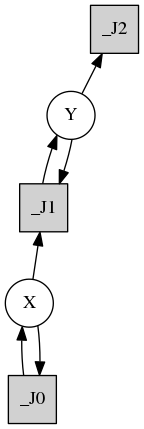

In [7]:
antimony_model = """
X -> 2X; k1*X;
X + Y -> 2Y; k2*X*Y;
Y -> ; k3*Y;

# Initialize values
X = 1;
Y = 1;


k1 = 1.5;
k2 = 0.8;
k3 = 0.9
"""
rr = te.loada(antimony_model)
rr.draw()

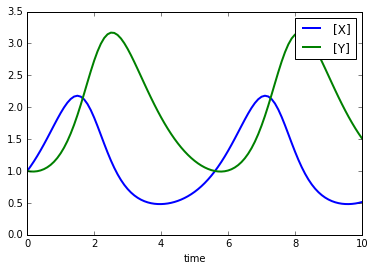

<module 'matplotlib.pyplot' from '/usr/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [4]:
# Carry out a time course simulation results returned in array result.
# Arguments are: time start, time end, number of points
result = rr.simulate (0, 10, 100)

# Plot the results
rr.plot (result)

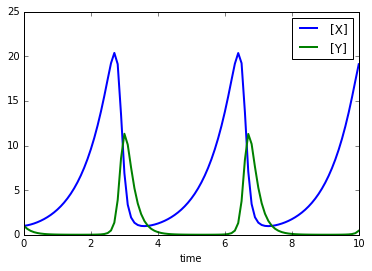

NameError: name 'np' is not defined

In [5]:
# generate data 
import pandas as pd
rr.k1 = 1.23113
rr.k2 = 0.7677
rr.k3 = 4.9
result = rr.simulate (0, 10, 100, reset=True)

# Plot the results
rr.plot (result)

noise = 0.1*np.random.randn(len(result),2)
result[:,1:] = result[:,1:] + result[:,1:]*noise

df = pd.DataFrame(result, columns=result.colnames)

df.to_csv("lotka_data.csv")

# fit model to experimental data

* somebody gave you measurements of X and Y from a recently conducted experiment. Load the data from `lotka_data.csv` (use pandas)
* write a function that computes the euclidean distance between a model simulation (result) and the given data. 
* write a function that accepts values for the parameters $k1$, $k2$ and $k3$ computes a model simulation with these parameters
* write a function that takes a vector of parameter values `[k1, k2, k3]`, simulates the model and returns the euclidean distance between model simulation and data
* use the differential evolution mehtod from the scipy.optimize library to identify the parameters `k1, k2, k3` based the experimental data. The differential evolution method is a global stochastic optimization technique, which requires upper and lower bounds for all parameters. Use `[0, 5]` as a bound for all parameters.
* what are the parameters that have been identified? Simulate the model and plot the result and the data

In [9]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.optimize
data = pd.read_csv("lotka_data.csv", index_col=0)

def result_data_distance(result, data):
    # compute the distance of the X and Y traces (omit the time column)
    diff = result[:,1:] - data.iloc[:,1:]
    return np.linalg.norm(diff)
    
def get_timecourse(rr, k1, k2, k3, t_start=0, t_end=10, steps=100):
    # compute and return the time course simulation for certain parameter values k1, k2 and k3
    rr.k1 = k1
    rr.k2 = k2
    rr.k3 = k3
    return rr.simulate (t_start, t_end, steps, reset=True)

def obj_fun(params):
    # simulate the model for the given paraemters and return the distance to the simulation result
    k1, k2, k3 = params
    tc = get_timecourse(rr, k1, k2, k3 )
    return result_data_distance(tc, data)

res = scipy.optimize.differential_evolution(obj_fun, [(0,5),(0,5),(0,5)])


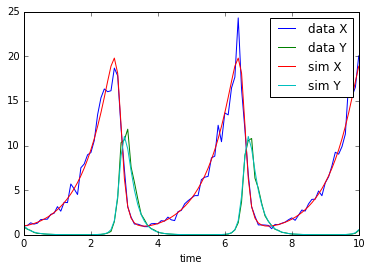

In [10]:
# simulate the model for the identified parameters
rr.k1, rr.k2, rr.k3 = res.x
result = rr.simulate (0, 10, 100, reset=True)
data["sim X"] = result[:,1]
data["sim Y"] = result[:,2]
data.columns = ['time', 'data X', 'data Y', 'sim X', 'sim Y']
data.plot(x='time')

# Steady state computation

* Load the threonine_boundary.xml model, which is a modified version of the Chassagnole model from 2001 describing the Threonine synthesis, taken from the [biomodels database](http://www.ebi.ac.uk/biomodels-main/BIOMD0000000066). In this version of the model the concentrations of aspartate and threonine as well as of the cosubstrates ATP,
ADP, NADPH, NADP and H$_2$O have been fixed, such that the model has a steady state. A detailed descriptiof the model, as well as a schematic overview can be found in the [original publication](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC1221852/pdf/11368768.pdf) of Chassagnole.

* simulate the model for 500 seconds and plot the results

* vary the concentration of Aspartate (asp) in the model between 0 and 5 and plot the result of a time course simulation

* do the same for the ATP concentration

* now we want to look at the steady state concentration of an intermediate (homoserine, hs) depending on the Aspartate and ADP concentrations. We will assume that the model is in steady state after 500 seconds. Write a function that returns the homoserine concentration at time-point 500, taking the Aspartate and ADP concentrations as an input.

* pass your function to the predefined plotting function `plot_surface` to create a 3D plot of the homoserine steaty state concentration



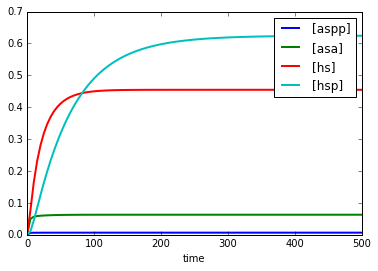

<module 'matplotlib.pyplot' from '/usr/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [11]:
rr = te.loadSBMLModel("threonine_boundary.xml")
result = rr.simulate (0, 500, 100, reset=True)
rr.plot (result)

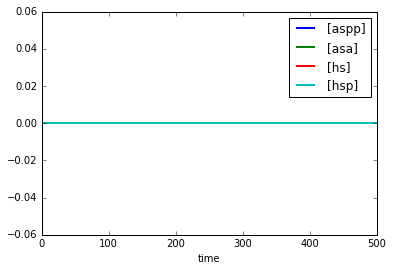

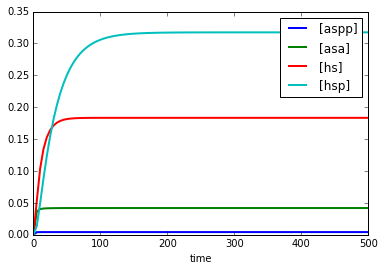

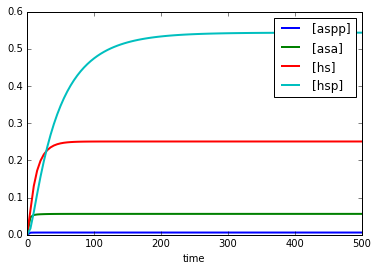

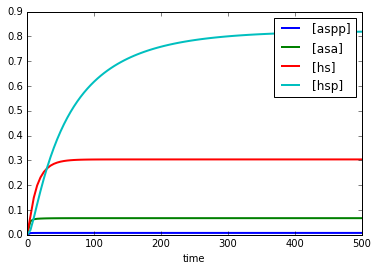

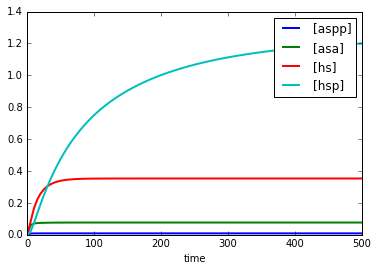

In [145]:
for asp in range(5):
    rr.asp = asp
    result = rr.simulate (0, 500, 100, reset=True)
    rr.plot (result)

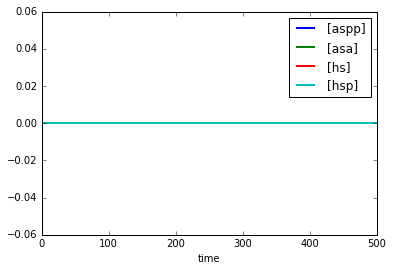

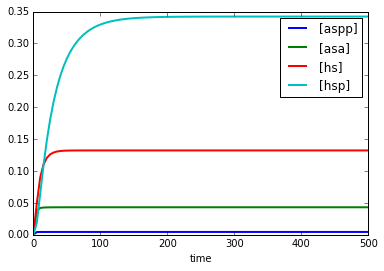

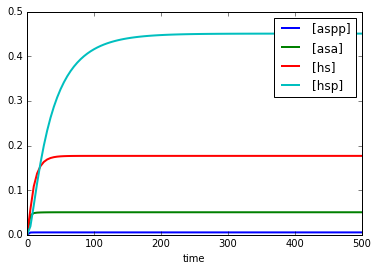

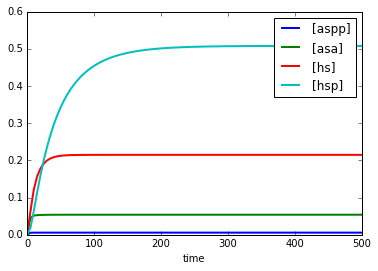

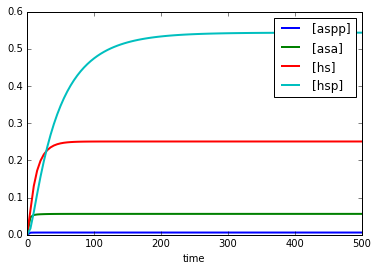

In [13]:
for atp in range(0,5):
    rr.atp = atp
    result = rr.simulate (0, 500, 100, reset=True)
    rr.plot (result)

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def plot_surface( function, 
                  x_values=np.arange(0, 10, 0.5), 
                  y_values=np.arange(0, 5, 0.5),
                  x_label = 'Aspartate',
                  y_label = 'ATP',
                  z_label = 'Homoserine',):
    """
    creates a 3D surface plot of an input function
    function -> a function f(x,y) -> z
    x_values -> array of x values 
    y_values -> array of y values 
    *_label -> label for *-a
    """
    X,Y = np.meshgrid(x_values,y_values)
    Z = np.zeros_like(X)
    for i in range(len(y_values)):
        for j in range(len(x_values)):
            Z[i,j] = function(X[i,j], Y[i,j])        
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z )
    plt.xlabel(x_label)
    plt.ylabel(y_label)    

In [15]:
def hs_steady_state(asp, atp):
    rr.asp = asp
    rr.atp = atp
    result = rr.simulate (0, 500, 100, reset=True)
    return result['[hs]'][-1]

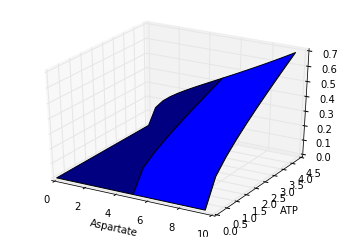

In [16]:
plot_surface(hs_steady_state)